# Living Things

This is a partial replication of the Rogers and McClelland network that learns categories of living things.

Code is partially taken from [here](https://iamtrask.github.io/2015/07/12/basic-python-network/). (Mostly just the feedforward and backpropagation algorithms.)

First import stuff, define the sigmoid function, and load the training set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
%matplotlib notebook

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

living_things = pd.read_excel('livingthings1.xls')
living_things

,Interpretation,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
0,Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
5,Bird,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
6,Pine,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Hardwood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Softwood,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Oak,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
living_things.set_index('Interpretation',inplace=True)
living_things.head()

,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
Interpretation,,,,,,,,,,,,,,,,
Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Initialize inputs and outputs. Each row is an input or output vector.

In [3]:
num_living_things = len(living_things.columns)
X = np.identity(num_living_things)
print(X.shape, X, sep='\n')

(16, 16)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [4]:
Y = living_things.values.T
print(Y.shape, Y, sep='\n')

(16, 42)
[[1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 

Initialize the network architecture.

In [5]:
numb_input_units = len(X)
numb_hidden_units = 10 # this is just based on what Whit had done previously
numb_output_units = Y.shape[1]

print(numb_input_units, numb_hidden_units, numb_output_units)

16 10 42


Initialize weights: uniformly distributed on [-1,1).

In [6]:
np.random.seed(1)
syn0 = 2*np.random.random((numb_input_units ,numb_hidden_units)) - 1
syn1 = 2*np.random.random((numb_hidden_units,numb_output_units)) - 1

print(syn0.shape, syn1.shape)

(16, 10) (10, 42)


Set error criterion and max number of epochs, which both govern how long training will go.

In [7]:
ecrit = 1
maxepochs = 30000

Train the network. Each `j` is an epoch; this program updates the weights after each full presentation of the training data. That's why the program feeds the entire training set through simultaneously.

In [8]:
for j in range(maxepochs):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = sigmoid(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = Y - l2
    
    # in what direction is the target value?
    # were we really sure? that is, was the activation level of l2 very high or very low? if so, don't change too much (exactly how much determined by the derivative of the sigmoid fxn).
    l2_delta = l2_error*sigmoid(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure (again, in terms of activation level of l1)? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

    if (j% 10000) == 0:
        print("\nEpoch: "    + str(j))
        print("Total curent error:",sum(sum(abs(l2_error))))
        print("Error by living thing:\n",abs(l2_error).sum(axis=1))
    
    if sum(sum(abs(l2_error))) < ecrit:
        print("\nError criterion met\n")
        break

print("Last epoch number:", j)
print("Total error at end of training:",sum(sum(abs(l2_error))))
print("Error by living thing:\n",abs(l2_error).sum(axis=1))


Epoch: 0
Total curent error: 335.015327675
Error by living thing:
 [ 21.1405527   20.99386995  21.17446559  22.3994846   19.25827086
  19.77638858  21.37899336  21.70882276  21.4258733   21.33360211
  20.24587336  19.29272518  21.1487301   21.92734661  20.90034899
  20.90997961]

Epoch: 10000
Total curent error: 1.68895320815
Error by living thing:
 [ 0.11355559  0.12725469  0.08510251  0.16039016  0.11706442  0.1290146
  0.07842004  0.08445072  0.09299518  0.10032723  0.09407222  0.10602776
  0.08636631  0.10150106  0.10167803  0.11073269]

Epoch: 20000
Total curent error: 1.18136957564
Error by living thing:
 [ 0.08013829  0.08924441  0.05950682  0.11193743  0.08191422  0.09119823
  0.05442779  0.05866613  0.06435185  0.06981721  0.06553405  0.07400418
  0.05970289  0.07106677  0.07110414  0.07875517]

Error criterion met

Last epoch number: 27672
Total error at end of training: 0.999999819533
Error by living thing:
 [ 0.06819351  0.07557036  0.05037316  0.09462962  0.06932252  0.07

## Exploring the trained network

How has the network learned to associate inputs (particular organisms) with outputs (their features)? We can investigate this by looking at the hidden unit representations for the different inputs.

In [9]:
living_things_trained = pd.DataFrame(data=l1, index=living_things.columns)
living_things_trained

,0,1,2,3,4,5,6,7,8,9
Ponderosa,0.982502,0.990869,0.021205,0.980981,0.012882,0.307282,0.164772,0.209809,0.010290,0.040463
White-Pine,0.441128,0.983040,0.009184,0.984282,0.130486,0.984665,0.012186,0.016342,0.203613,0.973459
Live-Oak,0.972559,0.968253,0.025532,0.893193,0.975574,0.031453,0.031854,0.027074,0.054668,0.985268
Black-Oak,0.980659,0.992488,0.564890,0.023910,0.991814,0.015280,0.442972,0.007356,0.011749,0.331979
French-Rose,0.139784,0.399922,0.263582,0.977612,0.370381,0.020701,0.991926,0.016959,0.978236,0.020582
Musk-Rose,0.020101,0.168524,0.376778,0.985514,0.022128,0.669794,0.988908,0.015540,0.976118,0.969514
Common-Daisy,0.979866,0.022272,0.976145,0.742421,0.302539,0.041973,0.906124,0.066286,0.908038,0.973450
Sunflower,0.976170,0.071183,0.958035,0.639396,0.057687,0.033690,0.986159,0.045450,0.042208,0.914429
Blackbird,0.075807,0.903182,0.987905,0.060384,0.970041,0.960987,0.170604,0.966485,0.046269,0.048466
Redwing,0.014640,0.973787,0.979347,0.246448,0.106786,0.980715,0.154137,0.980488,0.647187,0.069234


<IPython.core.display.Javascript object>


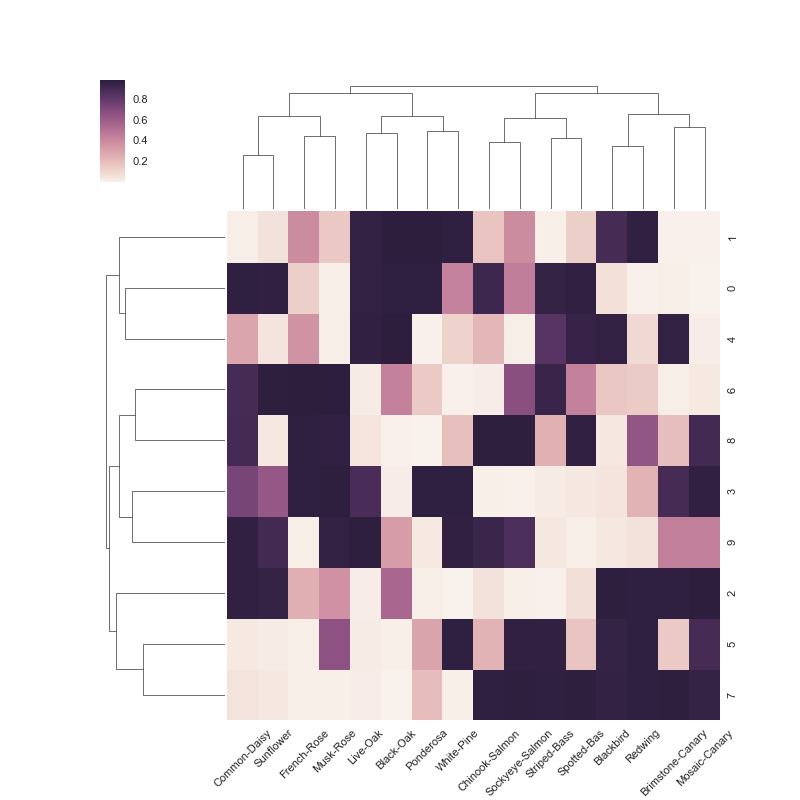

In [10]:
g = sns.clustermap(living_things_trained.T);
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45);

As expected, similar categories, like two different kinds of canary, have similar hidden unit representations.

Now try a PCA on the hidden unit representations

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
living_things_trained_reduced = pca.fit_transform(living_things_trained)
living_things_trained_reduced = pd.DataFrame(data=living_things_trained_reduced, index=living_things_trained.index)
living_things_trained_reduced

,0,1,2
Ponderosa,-0.583846,0.551499,-0.460394
White-Pine,-0.477199,0.039233,-0.861585
Live-Oak,-0.960699,0.802487,-0.256258
Black-Oak,-0.485391,1.075269,0.101347
French-Rose,-0.427847,-0.486397,0.025924
Musk-Rose,-0.411089,-1.135333,-0.151702
Common-Daisy,-0.738946,-0.656549,0.453649
Sunflower,-0.878035,-0.302178,0.206738
Blackbird,1.019333,0.706383,-0.554388
Redwing,1.006842,-0.043560,-0.652166


<IPython.core.display.Javascript object>


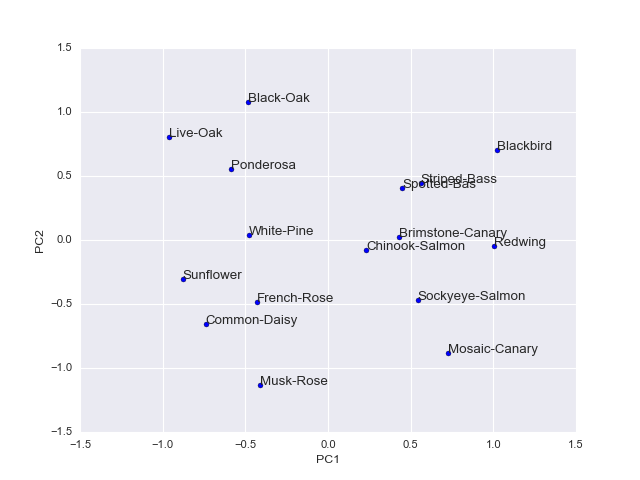

In [16]:
dim1 = 0
dim2 = 1

x = living_things_trained_reduced.iloc[:,dim1]
y = living_things_trained_reduced.iloc[:,dim2]
n = living_things_trained_reduced.index

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
    
ax.set_xlabel('PC{}'.format(dim1+1));
ax.set_ylabel('PC{}'.format(dim2+1));

Indeed, PC1 nicely separates the animals from the plants. PC2 seems to separate trees from flowers, but not fish from birds -- PC3 must be doing some work there.

Make a 3d plot so we can see all three principal components simultaneously.

<IPython.core.display.Javascript object>


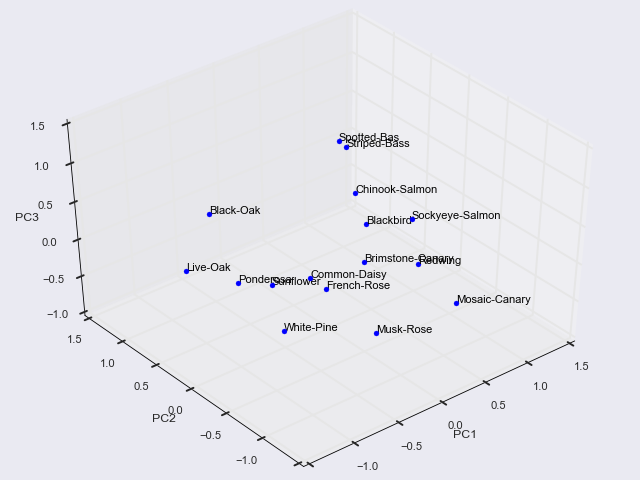

In [13]:
fig = figure()
ax = Axes3D(fig)

m = living_things_trained_reduced.values
n = living_things_trained_reduced.index

for i in range(len(m)): #plot each point + it's index as text above
    ax.scatter(m[i,0],m[i,1],m[i,2],color='b') 
    ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (n[i]), size=10, zorder=1,  
            color='k') 

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

PC3 separates fish from birds.

To see the further separation of the classes (e.g., oaks from pines), we probably would need to look at additional principal components.